<font color="#de3023"><h1><b>REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

To copy the notebook, go to File and click create "Save a copy to ..." and work on that copy.

Please submit a pdf of the page of your notebook (Ctrl + p on the page, save as pdf, and submit that pdf) on gradescope.

Please remember to assign pages to the appropriate questions. Not doing so will result in the deduction of points. Please submit a **pdf** version of the colab notebook.

We will not rerun your uploaded notebook, so make sure to run each cell before downloading so that all outputs and plots are visible on the saved pdf.


Homework 6: In this homework, you will train a two layer neural network for multiclass classification using gradient descent. However, instead of manually computing the gradients, you will use the autodiff provided by Tensorflow package.

## Question 0 Part 1
Do you have confusions or questions about the previous lectures?  (This is optional to answer)

(Answer here)

## Question 0 Part 2
Any suggestions or thoughts about the course? (This is optional to answer)

(Answer here)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Two-layer Neural Network


A two layer neural network contains an input layer, a hidden layer, and an output layer. The number of the input nodes in the diagram below is determined the dimension of our features. We are free to choose the dimension of the hidden layer. As for the final output layer, the number of nodes is determined by the type of the problem we are doing. For instance, for a regression problem, we will only have one node and the output value corresponds to our prediction of the target. As for classification, we will first output a vector that has same number of dimension as the number of classes in our classification dataset. Then, we will apply the softmax transformation on the vector to transform real-valued predictions to the class probabilities.
![](https://www.researchgate.net/profile/Haohan-Wang-4/publication/282997080/figure/fig4/AS:305939199610886@1449952997594/A-typical-two-layer-neural-network-Input-layer-does-not-count-as-the-number-of-layers-of.png)

Mathematically, this model can be written as

$$f(x) =  \sigma(x^{\intercal} W_1  +b_1) W_2 + b_2. $$

Note that if $x \in \mathbb{R}^{d \times 1}$, then $W_1 \in \mathbb{R}^{d \times H}$ and $W_2 \in \mathbb{R}^{H \times O}$, where $O$ is the output dimension. The dimension of $b_1$ and $b_2$ is self-evident.

Given an input $x$, the model first transforms it using the weight matrix $W_1$ and subsequently shifts the output by the bias term $b_1$. The function $\sigma(.)$ is called the activation function that introdues non-linearity in the model. For the purpose of this homework, we will use the so called relu-activation function that is defined as $\sigma(t) = \text{max}\{t, 0\}$. Note that that $x^{\intercal} W_1  +b_1$ generally gives us a vector, so we have to apply the relu activation to each element of the vector. Following the activation, the vector $h(x) =\sigma(x^{\intercal} W_1  +b_1)$ is defines the hidden layer. Finally, we apply the linear trasformation $ h(x) W_1 + b_2$ on the hidden layer.



This representation of the network is very convenient if you instead want to do matrix operations on your data. Suppose $X$ be your data matrix where $i^{th}$ row of $X$ contains $x_i^{\intercal}$, then the output of the network on the entire dataset can be written as
$$f(X) = \sigma(X W_1  +b_1) W_2 + b_2. $$

# Multiclass Classification

You will train the two layer neural network to do multiclass classification on digits dataset. Digits data is similar to MNIST  but has even smaller pixel.

In [2]:
# load the dataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y_int = load_digits(return_X_y=True)

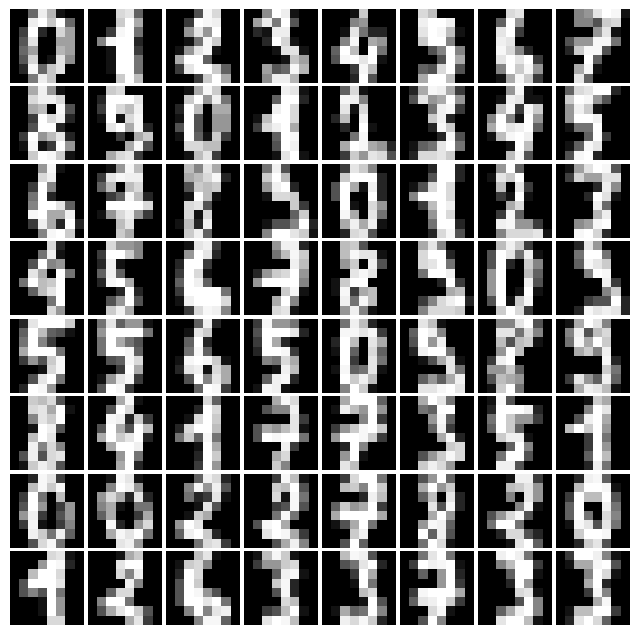

In [3]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(8, 8)
gs.update(wspace=0.05, hspace=0.05)

for i, img in enumerate(X[:64,:]):
  ax = plt.subplot(gs[i])
  plt.axis("off")
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.set_aspect("equal")
  plt.imshow(img.reshape([8, 8]), cmap='Greys_r')

In previous homeworks, you manually created an one hot encoding of the multiclass targets. We can use a function from keras, which is a high level deep learning API thats works pretty well with tensorflow.

In [4]:
from keras.utils import to_categorical
y_one_hot = to_categorical(y_int, num_classes=10)

In [5]:
# training-testing split and appropriate rescaling
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

In [6]:
#convert to tensors
X_train = tf.convert_to_tensor(X_train, dtype = tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype = tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype = tf.float32)
y_test= tf.convert_to_tensor(y_test, dtype = tf.float32)

<font color="#de3023"><h6><b>Question 1: Fill in the input dimension and output dimension of the two layer neural network appropriate for this dataset. (5 pts) </b></h6></font>

Remember the input dimension is the number of features in the vector $x$ and the output dimension is the number final outputs in $f(x)$.

In [7]:
# Replace "________" with your code
input_dim = X_train.shape[1]
hidden_dim = X_train.shape[1]*2
output_dim = 10

<font color="#de3023"><h6><b>Question 2: Define  tensorflow variables for  weights W1, b1, W2, and b2. Then, initialize both biases b1 and b2 to be 0 and initialize W1 and W2 by picking values uniformly at random from the interval [0, 0.1].  (5 pts) </b></h6></font>

Remember that in order the matrix products make sense, the dimension of the operants have to match. For example to calculate $x^{\intercal} W_1  +b_1 $, $W_1$ has to have the same number of rows as the number of features in the vector $x$ and $b_1$ has to have the same dimension as the resulting vector  $x^{\intercal} W_1$.

Another importan thing to keep in mind is that while using tensorflow, we need to work with Variables when we want to learn parameters such as $W_1, b_1, W_2$ and $b_2$, otherwise the automatic differentiation API of Tensorflow won't calculate the corresponding gradients.

In [8]:
# Replace "________" with your code
W1 = tf.Variable(tf.random.uniform(shape=(input_dim, hidden_dim), minval = 0, maxval = 0.1), trainable=True)
b1 = tf.Variable(tf.zeros(shape = (hidden_dim)))
W2 = tf.Variable(tf.random.uniform(shape=(hidden_dim, output_dim), minval = 0, maxval = 0.1), trainable=True)
b2 = tf.Variable(tf.zeros(shape = (output_dim)))

<font color="#de3023"><h6><b>Question 3: Complete the classifier function below to define a two layer neural network that outputs class probabilities for each class. Here, inputs is a matrix of shape $n \times d$, where $i^{th}$ row of the inputs matrix contains $x_i^{\intercal}$. (10 pts) </b></h6></font>

$$f(X) = \sigma(X W_1  +b_1) W_2 + b_2. $$

Hint: use [tf.nn.relu function](https://www.tensorflow.org/api_docs/python/tf/nn/relu) as the activation function $\sigma$, and use [tf.softmax.nn()](https://www.tensorflow.org/api_docs/python/tf/nn/softmax) function to compute softmax class probabilities.

In [9]:
# Replace "________" with your code
def classifier(inputs):
  hidden = tf.nn.relu(tf.add(tf.matmul(inputs, W1), b1))    # hidden layer with relu-activation
  # print("hidden", hidden)
  linear = tf.add(tf.matmul(hidden, W2), b2) # fully-connected  linear layer
  # print("linear", linear)
  softmax = tf.nn.softmax(linear)   #softmax layer
  # print("softmax", softmax)
  # print("softmax reduce sum 0", tf.reduce_sum(softmax, 0)) # (, 10) different total probabiliy for each label
  # print("softmax reduce sum 1", tf.reduce_sum(softmax, 1)) # (1257,) all 1, cause total of softmax across label is 1
  # print("Softmax wrong : ", tf.debugging.check_numerics(softmax, message = "softmax "))
  # print("HAHAHHAHA", tf.reduce_sum(softmax, 0))
  return softmax


<font color="#de3023"><h6><b>Question 4: Complete the  function below to compute cross entropy loss given one hot encoding of targets and predictions with class probabilities for each prediction. (10 pts) </b></h6></font>

\begin{align*}
\widehat{y}_{ij} &= softmax (x_i)_j \\
  L(W) &= -\frac{1}{n}\sum_{i =1}^n\sum_{j = 1}^{m}y_{ij}\log(\widehat{y}_{ij}) \\
  &= -\frac{1}{n} Y * \log(\widehat{Y})
\end{align*}

Where $*$ represents the elementwise product between 2 arrays and $\log$ is applied elementwise as well.

In [10]:
# Replace "________" with your code
def cross_entropy(predictions, targets):
  # print(predictions)
  # print(targets)
  # print(targets * tf.math.log(predictions))
  # print(tf.rekduce_sum(targets * tf.math.log(predictions), axis = 1))
  # print("log(predictions) wrong : ", tf.debugging.check_numerics(tf.math.log(predictions), message = "log predictions"))
  cr_entropies =  tf.reduce_sum(targets * tf.math.log(predictions))
  # print("cre", cr_entropies)
  # print("Cross entropies wrong : ", tf.debugging.check_numerics(cr_entropies, message = "cross entropies"))
  mean_cr_entropy =  - 1/ predictions.shape[0] * (cr_entropies)
  # mean_cr_entropy =  - tf.reduce_mean(cr_entropies)
  # print("mcre", mean_cr_entropy)
  return mean_cr_entropy

<font color="#de3023"><h6><b>Question 5: Complete the function below to train the neural network classifier using gradient descent. (5 pts) </b></h6></font> Hint: Use the function [tape.gradient](https://www.tensorflow.org/api_docs/python/tf/GradientTape#gradient) to calculate the gradients with the automatic differentiation API of Tensorflow.

$$W_1 = W_1 - \eta \nabla_{W_1}L$$

$$b_1 = b_1 - \eta \nabla_{b_1}L$$

$$W_2 = W_2 - \eta \nabla_{W_2}L$$

$$b_2 = b_2 - \eta \nabla_{b_2}L$$

In [11]:
# Replace "________" with your code
learning_rate = 0.1

def train(inputs, targets):
    with tf.GradientTape() as tape:
      predictions = classifier(inputs) #get predictions
      loss = cross_entropy(predictions, targets) #compute loss
    dW1, db1, dW2, db2 = tape.gradient(loss, [W1, b1, W2, b2]) #tape the gradients of both weights and biases
    # print(dW1, db1, dW2, db2)
    #update all weights and biases using the gradients computed above
    W1.assign_sub(dW1 * learning_rate)
    b1.assign_sub(db1 * learning_rate)
    W2.assign_sub(dW2 * learning_rate)
    b2.assign_sub(db2 * learning_rate)

    return loss

Train the model using 500 GD iterations.

In [12]:
for step in range(500):
    loss = train(X_train, y_train)
    if (step +1)%10==0:
      print(f"Loss at step {step}: {loss:.4f}")

Loss at step 9: 2.1881
Loss at step 19: 2.0532
Loss at step 29: 1.8796
Loss at step 39: 1.6656
Loss at step 49: 1.4302
Loss at step 59: 1.2008
Loss at step 69: 0.9961
Loss at step 79: 0.8214
Loss at step 89: 0.6783
Loss at step 99: 0.5667
Loss at step 109: 0.4821
Loss at step 119: 0.4177
Loss at step 129: 0.3682
Loss at step 139: 0.3292
Loss at step 149: 0.2978
Loss at step 159: 0.2721
Loss at step 169: 0.2506
Loss at step 179: 0.2323
Loss at step 189: 0.2165
Loss at step 199: 0.2026
Loss at step 209: 0.1904
Loss at step 219: 0.1796
Loss at step 229: 0.1699
Loss at step 239: 0.1612
Loss at step 249: 0.1534
Loss at step 259: 0.1463
Loss at step 269: 0.1398
Loss at step 279: 0.1338
Loss at step 289: 0.1284
Loss at step 299: 0.1233
Loss at step 309: 0.1186
Loss at step 319: 0.1142
Loss at step 329: 0.1101
Loss at step 339: 0.1063
Loss at step 349: 0.1027
Loss at step 359: 0.0993
Loss at step 369: 0.0961
Loss at step 379: 0.0931
Loss at step 389: 0.0903
Loss at step 399: 0.0875
Loss at ste

Suppose, given the vector of class probabilities, you output the label with the highest class probability as your label. As an evaluation of our model, we want to compute the number of mistakes that the model makes. For instance, if $y$ is the true label and $\widehat{y}$ is the prediction of the model, we will evaluate our model on this point with 0-1 loss
$$\mathbb{1}( \widehat{y} \neq y ).$$
Over $n$ points, we will compute the mean 0-1 loss,
$$\frac{1}{n}\sum_{i=1}^n \mathbb{1}( \widehat{y}_i \neq y_i ).$$

<font color="#de3023"><h6><b>Question 6: Compute the mean 0-1 loss of your classifier on the test data. (5pts) </b></h6></font>

In [14]:
y_pred = classifier(X_test)

# print(y_pred)
# print(y_test)
y_label = tf.argmax(y_pred, axis = 1)
y_test_label = tf.argmax(y_test, axis = 1)
# print(y_label)
# print(y_test_label)
matches = y_label == y_test_label
# print(matches)
mean = tf.reduce_mean(tf.cast(matches, tf.float32))
print(f"accuracy: {mean}")


accuracy: 0.9685184955596924
